In [3]:
import pandas as pd
import numpy as np
import random
import io

### Leemos la base de datos a trabajar en nuestra ruta de origen

In [4]:
econdata = pd.read_csv("econdata.csv")

In [5]:
econdata.head(5)

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
1,1,"19.4346139576,-99.1413808393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_008_01,Cuautémoc,A,Museo,Museo Nacional de Arquitectura Palacio de Bell...
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
4,4,"19.42358238,-99.12451093","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_115_12,Venustiano Carranza,B,Hotel,real


### Funciones de muestreo

## 1) Muestreo aleatorio simple

In [6]:
aleat_8 = econdata.sample(n=8)
aleat_8

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
63,63,"19.4339116282,-99.1468371035","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_015_07,Cuautémoc,B,Hotel,Calvin
86,86,"19.4244645173,-99.1433325213","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_085_04,Cuautémoc,B,Hotel,San Juan
54,54,"19.4263645964,-99.1399088724","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_076_12,Cuautémoc,B,Hotel,"Cadillac, S.A. DE C.V."
53,53,"19.4419740424,-99.1401449131","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_069_16,Cuautémoc,B,Hotel,Magnolia A
185,185,"19.42697144,-99.1415371446","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",001_065_14,Cuautémoc,A,Hotel,Virreyes
58,58,"19.4244380424,-99.1306732022","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",307_124_19,Cuautémoc,B,Hotel,Unico
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
142,142,"19.4263681354,-99.1327278126","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_127_14,Cuautémoc,A,Hotel,Ambar


In [7]:
prop_25 = econdata.sample(frac= .25)
prop_25.head()

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
118,118,"19.44371481,-99.14271352","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_050_07,Cuautémoc,B,Hotel,Manolete
2,2,"19.4340695945,-99.1306348409","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",006_002_12,Cuautémoc,A,Museo,Santa Teresa
99,99,"19.4438918423,-99.1402516182","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_052_18,Cuautémoc,B,Hotel,Drigales
170,170,"19.43162145,-99.13535842","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",001_028_11,Cuautémoc,A,Hotel,NH Hoteles
62,62,"19.4377973772,-99.1504216904","{""type"": ""MultiPoint"", ""coordinates"": [[-99.15...",011_034_16,Cuautémoc,B,Hotel,Ramada Reforma


## 2) Muestreo sistematico

In [8]:
def systematic_sampling(econdata, step):
    indexes = np.arange(0, len(econdata), step= step)
    systematic_sample = econdata.iloc[indexes]
    return systematic_sample

systematic_sample = systematic_sampling(econdata, 3)
systematic_sample

,id,geo_point_2d,geo_shape,clave_cat,delegacion,perimetro,tipo,nom_id
0,0,"19.424781053,-99.1327537959","{""type"": ""Polygon"", ""coordinates"": [[[-99.1332...",307_130_11,Cuauhtémoc,B,Mercado,Pino Suárez
3,3,"19.42489472,-99.12073393","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_102_06,Venustiano Carranza,B,Hotel,Balbuena
6,6,"19.43553422,-99.12324801","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",318_116_11,Venustiano Carranza,B,Hotel,San Antonio Tomatlan
9,9,"19.4407152937,-99.1498060057","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",012_146_22,Cuautémoc,B,Hotel,Detroit
12,12,"19.43990186,-99.14813347","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",003_079_16,Cuautémoc,B,Hotel,La Paz
...,...,...,...,...,...,...,...,...
216,216,"19.4247697438,-99.1249707246","{""type"": ""Polygon"", ""coordinates"": [[[-99.1250...",323_118_37,Venustiano Carranza,B,Mercado,Lamininas de La Merced
219,219,"19.4234096295,-99.1438351156","{""type"": ""MultiPoint"", ""coordinates"": [[-99.14...",002_118_03,Cuautémoc,B,Hotel,Prado Floresta
222,222,"19.4397905042,-99.134628735","{""type"": ""MultiPoint"", ""coordinates"": [[-99.13...",004_063_10,Cuautémoc,A,Hotel,Ladero
225,225,"19.43094655,-99.12455418","{""type"": ""MultiPoint"", ""coordinates"": [[-99.12...",323_027_04,Venustiano Carranza,B,Hotel,Gran Veracruz


## 3) Muestreo estratificado

In [9]:
econdata['estratificado'] = econdata['delegacion'] + "," + econdata['tipo']
(econdata['estratificado'].value_counts()/len(econdata)).sort_values(ascending= False)

Cuautémoc,Hotel                0.643478
Cuautémoc,Museo                0.156522
Venustiano Carranza,Hotel      0.078261
Cuauhtémoc,Mercado             0.073913
Venustiano Carranza,Mercado    0.047826
Name: estratificado, dtype: float64

Nuestros datos dicen que la proporcion es la siguiente:
1) Hoteles de Cuauhtémoc 0.5
2) Mueseo de Cuauhtémoc 0.2
3) Hoteles de  Venustiana Carranza 0.1
4) Mercados de Cuauhtémoc 0.1 
5) Mercados de Venustiana Carranza 0.1

In [10]:
from dataclasses import replace


def data_estratificada(econdata, nombres_columnas_estrat, valores_estrat, prop_estrat, random_state=None):
    df_estrat = pd.DataFrame(columns= econdata.columns)

    pos = -1
    for i in range(len(valores_estrat)):   
        pos += 1
        if pos == len(valores_estrat) - 1:
            ratio_len = len(econdata) - len(df_estrat)
        else:
            ratio_len = int(len(econdata) * prop_estrat[i])

        df_filtrado = econdata[econdata[nombres_columnas_estrat] == valores_estrat[i]]
        df_temp = df_filtrado.sample(replace=True, n=ratio_len, random_state=random_state)

        df_estrat = pd.concat([df_estrat, df_temp])
    return df_estrat 

In [11]:
valores_estrat = ['Cuautémoc,Hotel', 'Cuautémoc,Museo', 'Venustiano Carranza,Hotel', 'Cuauhtémoc,Mercado', 'Venustiano Carranza,Mercado']
prop_estrat = [0.5, 0.2, 0.1, 0.1, 0.1]
df_estrat = data_estratificada(econdata, 'estratificado', valores_estrat, prop_estrat, random_state = 42)

In [12]:
a = np.array([7, 10, 12, 13, 16, 9, 8, 12, 8, 6, 16, 23, 11, 17, 20, 21, 25, 30, 31, 33, 37, 39, 27, 36, 40, 43, 41, 45])


In [13]:
variance= np.var(a)
desv=np.std(a)
print(variance, desv)

155.06122448979593 12.452358189909088


## Varianza y desviación estandar

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

## Leemos la base da datos a trabajar en nuestra ruta de origen

In [15]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris = pd.read_csv(url, names = names)

In [16]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


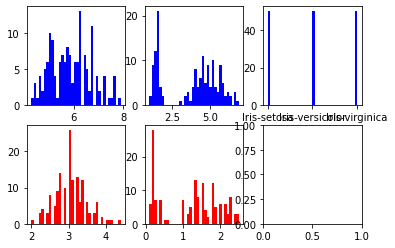

In [47]:
fig, axs = plt.subplots(2,3)
axs[0,0].hist(iris['sepal-length'], color= 'blue', bins= int(180/5))
axs[0,1].hist(iris['petal-length'], color= 'blue', bins= int(180/5))
axs[0,2].hist(iris['class'], color= 'blue', bins= int(180/5))
axs[1,0].hist(iris['sepal-width'], color= 'red', bins= int(180/5))
axs[1,1].hist(iris['petal-width'], color= 'red', bins= int(180/5))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

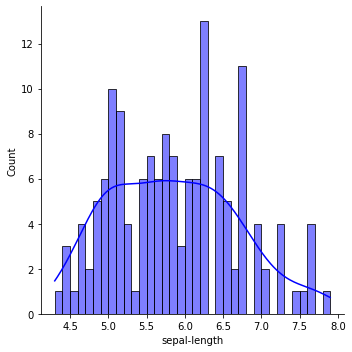

In [42]:

sns.displot(iris['sepal-length'], kde = True, bins = int(180/5), color = 'blue')
plt.show

## Cálculo Varianza

In [49]:
print("sepal-length var:",iris['sepal-length'].var())
print("sepal-width var:",iris['sepal-width'].var())
print("petal-length var:",iris['petal-length'].var())
print("petal-width var:",iris['petal-width'].var())

sepal-length var: 0.6856935123042507
sepal-width var: 0.1880040268456376
petal-length var: 3.113179418344519
petal-width var: 0.582414317673378


## Cálculo de desviación estandar

In [51]:
print("sepal-length std:",iris['sepal-length'].std())
print("sepal-width std:",iris['sepal-width'].std())
print("petal-length std:",iris['petal-length'].std())
print("petal-width std:",iris['petal-width'].std())

sepal-length std: 0.828066127977863
sepal-width std: 0.4335943113621737
petal-length std: 1.7644204199522626
petal-width std: 0.7631607417008411


## Media

In [52]:
print("sepal-length mean:",iris['sepal-length'].mean())
print("sepal-width mean:",iris['sepal-width'].mean())
print("petal-length mean:",iris['petal-length'].mean())
print("petal-width mean:",iris['petal-width'].mean())

sepal-length mean: 5.843333333333334
sepal-width mean: 3.0540000000000003
petal-length mean: 3.758666666666666
petal-width mean: 1.1986666666666668


## Creación de muestra mediante Muestreo Aleatorio Simple

In [35]:
muestra = iris.sample(frac=0.5)
muestra

,sepal-length,sepal-width,petal-length,petal-width,class
147,6.5,3.0,5.2,2.0,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
124,6.7,3.3,5.7,2.1,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
...,...,...,...,...,...
128,6.4,2.8,5.6,2.1,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica
93,5.0,2.3,3.3,1.0,Iris-versicolor
49,5.0,3.3,1.4,0.2,Iris-setosa


## Cálculo de la varianza

In [56]:

print("sepal-length var:",muestra['sepal-length'].var())
print("sepal-width var:",muestra['sepal-width'].var())
print("petal-length var:",muestra['petal-length'].var())
print("petal-width var:",muestra['petal-width'].var())

sepal-length var: 0.631664864864865
sepal-width var: 0.1633081081081081
petal-length var: 3.0895495495495497
petal-width var: 0.5816864864864866


## Cálculo de la desviación estandar

In [55]:

print("sepal-length std:",muestra['sepal-length'].std())
print("sepal-width std:",muestra['sepal-width'].std())
print("petal-length std:",muestra['petal-length'].std())
print("petal-width std:",muestra['petal-width'].std())

sepal-length std: 0.7947734676402233
sepal-width std: 0.40411397910503927
petal-length std: 1.7577114523008461
petal-width std: 0.7626837394926462


In [57]:
muestra['sepal-length'].mean()
print("sepal-length mean:",muestra['sepal-length'].mean())
print("sepal-width mean:",muestra['sepal-width'].mean())
print("petal-length mean:",muestra['petal-length'].mean())
print("petal-width mean:",muestra['petal-width'].mean())

sepal-length mean: 5.932
sepal-width mean: 3.0560000000000005
petal-length mean: 3.8933333333333335
petal-width mean: 1.256
